In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyupbit
import mpl_finance
from datetime import timedelta

# Data Preprocessing
* Input : Candlestick Chart Image

In [ ]:
# Load data(pattern's starting point, ending point) and corresponding labels(pattern type)

df = pd.read_csv('data.csv', usecols=['start', 'end', 'type'])   # 'data.csv' : labeled from raw data -> constructed ground truth
df.head()

,start,end,type
0,2019-05-06 09:15:00,2019-05-06 21:30:00,sym
1,2019-05-10 12:20:00,2019-05-10 16:00:00,sym
2,2019-05-11 15:30:00,2019-05-11 21:25:00,fal
3,2019-05-23 22:15:00,2019-05-24 01:45:00,ris
4,2019-05-24 07:35:00,2019-05-24 15:00:00,fal


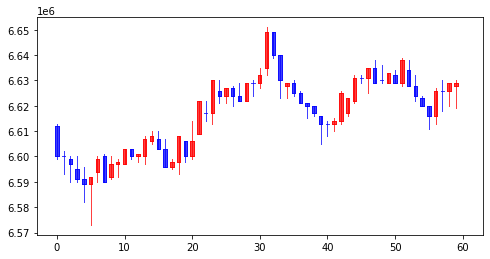

In [ ]:
# Draw candle stick chart for the first data

ohlc = pyupbit.get_ohlcv("KRW-BTC", interval="minute5", count=60, to=pd.to_datetime(df.end[0])-timedelta(hours=8, minutes=55))   # get ohlc(open, high, low, close) values using pyupbit library
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
mpl_finance.candlestick2_ohlc(ax, ohlc['open'], ohlc['high'], ohlc['low'], ohlc['close'], width=0.5, colorup='r', colordown='b')   # draw candlestick chart
plt.show()

In [ ]:
# Draw candlestick chart and Save as image file(.png)

for i in range(len(df)):
  ohlc = pyupbit.get_ohlcv("KRW-BTC", interval="minute5", count=60, to=pd.to_datetime(df.end[i])-timedelta(hours=8, minutes=55))
  fig = plt.figure(figsize=(8,4))
  ax = fig.add_subplot(111)
  mpl_finance.candlestick2_ohlc(ax, ohlc['open'], ohlc['high'], ohlc['low'], ohlc['close'], width=0.5, colorup='r', colordown='b')   # draw candlestick chart,
  plt.savefig('input image path/'+str(df.type[i])+'/'+f'Plot {i+1}'+'.png')   # and save it as image file(.png)
  plt.close(fig)